**Deep Learning Notebook 1**

Dataset: MNIST digits dataset available as part of Keras

Objectives:
1. Study MLP architecture (i.e. input, output neurons, hidden layers)
2. Activation function
3. Loss function
4. Hyperparameter tuning using grid search
5. Saving and reloading trained models
6. Callback to terminate learning early, when it is not fruitful

**0. First Steps**

In [ ]:
# 0.1 Import the required libraries, modules

import tensorflow as tf
from tensorflow import keras

In [ ]:
# 0.2 Check the version details

print("TF Version: ", tf.__version__)
print("Keras Version: ", keras.__version__)

TF Version:  2.3.0
Keras Version:  2.4.0


In [ ]:
# 0.3 Load the dataset

mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [ ]:
# 0.4 Check data shape

X_train_full.shape

(60000, 28, 28)

In [ ]:
# 0.5 Normalize by dividing by 255

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
# 0.6 Set class names

class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

End of First Steps

**1. Simple Model**

In [ ]:
# 1.1 Input --> hiddel layer 1 (300) --> hidden layer 2 (100) --> output layer (10) 

model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# 1.2 Check model details

model_1.summary()

Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_130 (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_531 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_532 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_533 (Dense)            (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 1.3 Compile the model

model_1.compile(loss=keras.losses.sparse_categorical_crossentropy,
                optimizer=keras.optimizers.SGD(),
                metrics=[keras.metrics.sparse_categorical_accuracy])

In [ ]:
# 1.4 Training the model

history_1 = model_1.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6183 - sparse_categorical_accuracy: 0.8352 - val_loss: 0.3124 - val_sparse_categorical_accuracy: 0.9142
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2871 - sparse_categorical_accuracy: 0.9184 - val_loss: 0.2427 - val_sparse_categorical_accuracy: 0.9336
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2340 - sparse_categorical_accuracy: 0.9327 - val_loss: 0.2041 - val_sparse_categorical_accuracy: 0.9414
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1988 - sparse_categorical_accuracy: 0.9434 - val_loss: 0.1808 - val_sparse_categorical_accuracy: 0.9500
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1730 - sparse_categorical_accuracy: 0.9503 - val_loss: 0.1604 - val_sparse_categorical_accuracy: 0.9560
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1532 - spars

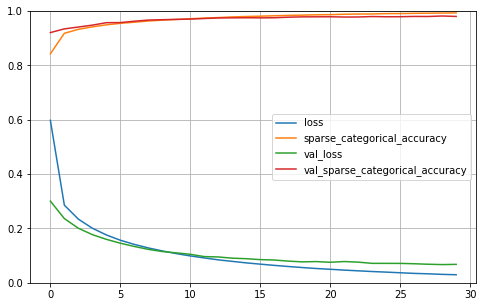

In [ ]:
# 1.5 Plot the performance of model 1 on train dataset

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
# 1.6 Evaluate model on test dataset

model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - sparse_categorical_accuracy: 0.9787


[0.06838741898536682, 0.9786999821662903]

In [1]:
# 1.7 Saving the simple model in HDF5 format

model_1.save("model_1.h5")

NameError: ignored

In [ ]:
# 1.8 Loading the saved model and testing

test1 = keras.models.load_model("model_1.h5")
test1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - sparse_categorical_accuracy: 0.9787


[0.06838741898536682, 0.9786999821662903]

End of Model 1

**2. Model with Callback & Hyperparameter Tuning**

In [ ]:
# 2.1 Define model

def defmodel_2(n_hidden = 2, n_neurons = 150, learning_rate = 0.015):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer = "sgd",
                  metrics = ["accuracy"])
    return model  

# Instantiate model

model_2 = keras.wrappers.scikit_learn.KerasClassifier(defmodel_2)

In [ ]:
# 2.2 Grid search

# Import the required libraries/modules

from scipy.stats import reciprocal
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize parameters dictionary

param_dict = {
    "n_hidden": [2],
    "n_neurons": [100, 150, 200],
    "learning_rate": [0.01, 0.015, 0.02]
}

grid_search_cv_model_2 = GridSearchCV(model_2, param_dict, cv = 3, n_jobs = -1)
grid_search_cv_model_2.fit(X_train, y_train, epochs = 30, 
                           validation_data=(X_valid, y_valid),
                           callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6167 - accuracy: 0.8409 - val_loss: 0.3168 - val_accuracy: 0.9114
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2959 - accuracy: 0.9149 - val_loss: 0.2500 - val_accuracy: 0.9314
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2451 - accuracy: 0.9290 - val_loss: 0.2146 - val_accuracy: 0.9398
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2115 - accuracy: 0.9389 - val_loss: 0.1902 - val_accuracy: 0.9476
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1863 - accuracy: 0.9465 - val_loss: 0.1710 - val_accuracy: 0.9534
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1660 - accuracy: 0.9521 - val_loss: 0.1560 - val_accuracy: 0.9564
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1499 - accuracy: 0.9566 - val_loss: 0.1435 - val_accuracy:

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fab174a0b70>,
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.015, 0.02], 'n_hidden': [2],
                         'n_neurons': [100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# 2.3 Fetch best parameter values

print("Best parameter values: ", grid_search_cv_model_2.best_params_)

# Fetch best score

print("Best accuracy score: ", grid_search_cv_model_2.best_score_)

Best parameter values:  {'learning_rate': 0.02, 'n_hidden': 2, 'n_neurons': 200}
Best accuracy score:  0.9689636627833048


In [ ]:
# 2.4 Build final model with best parameters

model_2_final = grid_search_cv_model_2.best_estimator_.model

history_2 = model_2_final.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0083 - accuracy: 0.9994 - val_loss: 0.0727 - val_accuracy: 0.9824
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0081 - accuracy: 0.9993 - val_loss: 0.0732 - val_accuracy: 0.9808
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0078 - accuracy: 0.9995 - val_loss: 0.0739 - val_accuracy: 0.9826
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0075 - accuracy: 0.9995 - val_loss: 0.0745 - val_accuracy: 0.9830
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0072 - accuracy: 0.9995 - val_loss: 0.0737 - val_accuracy: 0.9824
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0069 - accuracy: 0.9996 - val_loss: 0.0736 - val_accuracy: 0.9828
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0067 - accuracy: 0.9996 - val_loss: 0.0754 - val_accuracy:

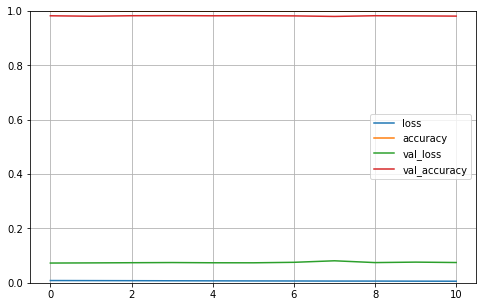

In [ ]:
# 2.5 Plot the performance of final model on train dataset

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
# 2.6 Evaluate final model on test dataset

model_2_final.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.9795


[0.0721224918961525, 0.9794999957084656]

In [ ]:
# 2.6 Saving the final model in HDF5 format

model_2_final.save("model_2.h5")

In [ ]:
# 2.7 Loading the saved model and testing

test2 = keras.models.load_model("model_2.h5")
test2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.0982


[0.0721224918961525, 0.0982000008225441]

End of Model 2

In [ ]:
# Import the required libraries/modules

%tensorflow_version 2.x
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
tf.__version__

'2.4.0'

In [ ]:
# Start with the VGG16 model Use imagenet weights and exclude the top of the network
base_model = tf.keras.applications.VGG16(include_top = False, weights = 'imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [3]:
import os

os.getcwd()

'/content'